# Loan Application Status Prediction

In [37]:
from IPython.display import Image
Image(url= "https://i.ytimg.com/vi/tl3mBASGa_M/maxresdefault.jpg")

# 1.Introduction

#### Distribution of the loans is the core business part of almost every banks. The main portion the bank’sassets is directly came from the profit earned from the loans distributed by the banks. The prime objective inbanking environment is to invest their assets in safe hands where it is. Today many banks/financial companiesapproves loan after a regress process of verification and validation but still there is no surety whether thechosen applicant is the deserving right applicant out of all applicants. Through this system we can predictwhether that particular applicant is safe or not and the whole process of validation of features is automated bymachine learning technique. The disadvantage of this model is that it emphasize different weights to each factorbut in real life sometime loan can be approved on the basis of single strong factor only, which is not possiblethrough this system.
#### Loan Prediction is very helpful for employee of banks as well as for the applicant also. The aim of thisPaper is to provide quick, immediate and easy way to choose the deserving applicants. It can provide specialadvantages to the bank. The Loan Prediction System can can automatically calculate the weight of each featurestaking part in loan processing and on new test data same features are processed with respect to their associatedweight .A time limit can be set for the applicant to check whether his/her loan can be sanctioned or not. LoanPrediction System allows jumping to specific application so that it can be check on priority basis. This Paper isexclusively for the managing authority of Bank/finance company, whole process of prediction is done privatelyno stakeholders would be able to alter the processing. Result against particular Loan Id can be send to variousdepartment of banks so that they can take appropriate action on application. This helps all othersdepartment tocarried out other formalities.

#### Predict Loan Eligibility for Dream Housing Finance company
#### Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.
#### Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others.
#### To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.



# 2.What Methods I wiil going to solve ?

#### Loan Prediction Methodology:
######  Loading The Dataset
######   Feature Selection Method Using Info Gain Of Features.
######   Train Model on Training Dataset
######   Test the model on Testing Dataset
######   Result Analysis
    
    
#### MACHINE LEARNING METHODS:
#### Six machine learning classification models have been used for prediction of Loan Prediction:
    Decision Trees
    AdaBoostClassifier
    RandomForestClassifier
    LogisticRegression
    XGBClassifier.

# 3. Details about the dataset

In [38]:
from IPython.display import Image
Image(url= "https://miro.medium.com/max/700/1*8wgAKfRS6c62V14PhVKxKA.png")

# 4.Importing All Necessary libraries

In [38]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# preprocession, normalizing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn import metrics

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# models

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# preprocessing and normalizing
from sklearn.preprocessing import LabelEncoder

# metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


#### By Importing above All Necessary Libraries I got the idea of implementing all the Libraries in one go for better model Prediction in this dataset.

# 5.Reading the Csv file

In [3]:
df = pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Here I am loading the data set into a variable i.e. “df” and processing the first 5 rows.
#### After Reading the csv file I find out that Next_Tmax, Next_Tmin are label columns while remaning are the Features columns.

# 6.EDA - Exploratory Data Analysis

#### In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.
#### EDA which focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed.

In [4]:
df.shape

(614, 13)

#### By using shape I got 614 rows and 13 columns.

In [5]:
# lets find out is there any null values in dataset or not

pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Also, most of the column are object in nature,few columns are float64 in type and ApplicantIncome is of integer data type.

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(614, 13)

****From the above code I can analayze there is no duplicates in this dataset.****

In [8]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

**** By finding (df.unique()) it distinguish the difference between continious & categorical columns in this dataset.****

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


****Above statatics data show that there multiple outliers mostly in ApplicantIncome.
There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction.****

****Also, number of rows in each column are not same, means there are null values in the data set.****

****Also, the mean and 50%value of most of the column are not same and the STD and mean have a major differnce to each other.****

****Most of the columns of min value are near to 0 values.****

****By checking the difference between the 75% and max value there are outliers in some of the column, I will check it soon.****

# Filling Missing Values

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# filling the missing values of categorical columns
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

# filling the missing values of continious columns
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

##### Ater using Fillna in most of the continuous columns By taking mean & mode in categorical column it has been filled all the Missing Values and the count of the Dataset is matching.

# Data visualization

### Data visualization
#### Data visualization is the process of translating large data sets and metrics into charts, graphs and other visuals. The resulting visual representation of data makes it easier to identify and share real-time trends, outliers, and new insights about the information represented in the data.Data visualization gives us a clear idea of what the information means by giving it visual context through maps or graphs. This makes the data more natural for the human mind to comprehend and therefore makes it easier to identify trends, patterns, and outliers within large data sets.
### According to my perception I have done below Data visualization in this Project.
### Count Plot
#### A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.countplot() method is used to Show the counts of observations in each categorical bin using bars. Syntax : seaborn.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, kwargs)A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot(), so you can compare counts across nested variables.
### PiePlot
#### A pie plot is a proportional representation of the numerical data in a column. This function wraps matplotlib. ... pie() for the specified column. If no column reference is passed and subplots=True a pie plot is drawn for each numerical column independently.
### Cat plot
#### Catplot shows frequencies of the categories of one, two or three categorical variables.This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations.

### Histogram Plot
#### To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable.The bins (intervals) must be adjacent and are often (but not required to be) of equal size. If the bins are of equal size, a rectangle is erected over the bin with height proportional to the frequency—the number of cases in each bin. A histogram may also be normalized to display "relative" frequencies. It then shows the proportion of cases that fall into each of several categories, with the sum of the heights equaling 1.
### Distribution Plot
#### A distribution plot displays a distribution and range of a set of numeric values plotted against a dimension. ... In a distribution chart, ideally, two dimensions and one measure are used. If so, you will get the individual line of range and distribution.

**Loan_Status**

In [70]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

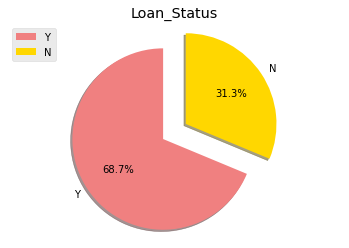

In [71]:
#  pie plot of Loan_Status 

labels = ['Y', 'N']
value = [422, 192]
colors = ['lightcoral','gold']
explode = [0.3,0]# 

plt.style.use('ggplot')
plt.title('Loan_Status')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

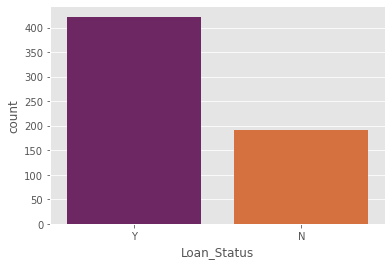

In [72]:
sns.countplot(df['Loan_Status'],palette = 'inferno',data=df);

##### From The Above Plots  "Loan_Status" column i can see "Y" shows the Approval and "N" give Disapproval of Loan in the Dataset.

**Gender**

In [13]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

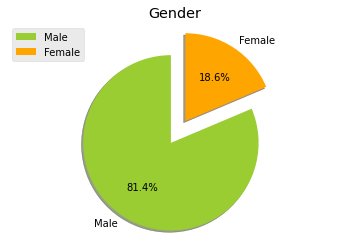

In [14]:
#  pie plot of Gender 

labels = ['Male', 'Female']
value = [489, 112]
colors = ['yellowgreen','orange']
explode = [0.3,0]# 

plt.style.use('ggplot')
plt.title('Gender')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

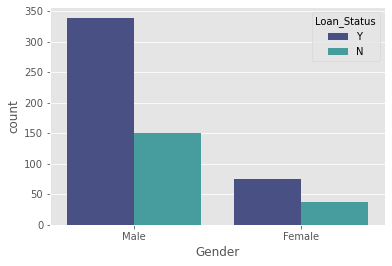

In [15]:
sns.countplot(df['Gender'],palette='mako',hue='Loan_Status',data=df);

<Figure size 1080x720 with 0 Axes>

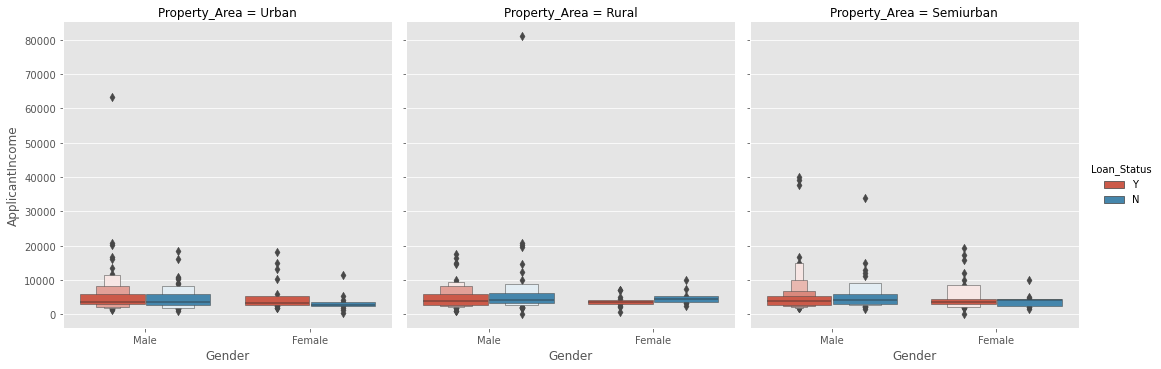

In [17]:
# Variable - 'Gender'  Vs 'ApplicantIncome' & hue = Loan_Status, col = Proprty_Area
plt.figure(figsize=(15,10))
sns.catplot(x='Gender',y='ApplicantIncome',data=df,kind='boxen',hue='Loan_Status', col='Property_Area')

#### From The Above Plots "Gender" column i can see Male has a strong Loan_Status rather than Female in the Dataset.¶


**Married**

In [18]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

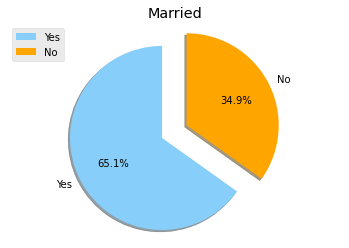

In [19]:
#  pie plot of Married 

labels = ['Yes', 'No']
value = [398, 213]
colors = ['lightskyblue','orange']
explode = [0.3,0]# 

plt.style.use('ggplot')
plt.title('Married')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

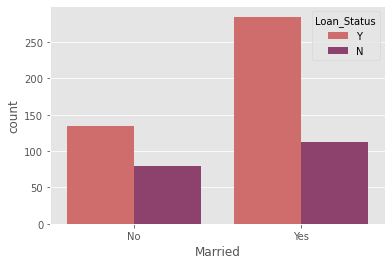

In [20]:
sns.countplot(df['Married'],palette='flare',hue='Loan_Status',data=df);

<Figure size 1080x720 with 0 Axes>

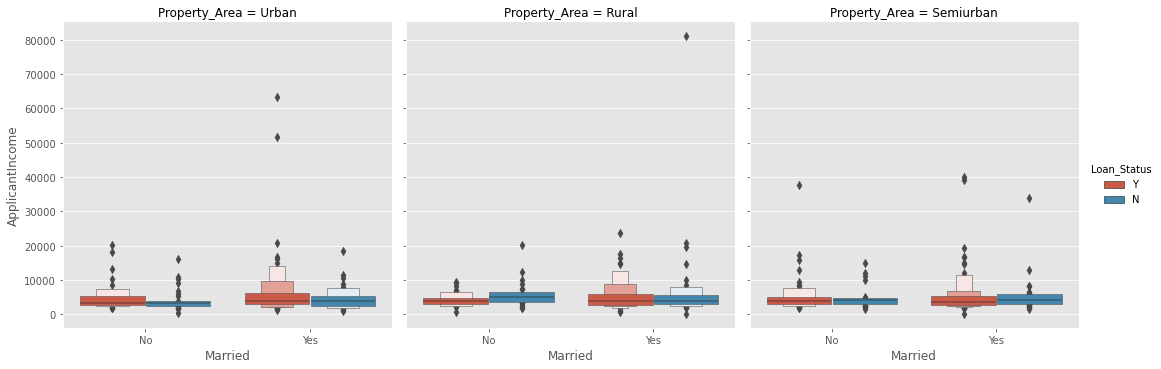

In [21]:
# Variable - 'Married'  Vs 'ApplicantIncome' & hue = Loan_Status, col = Proprty_Area
plt.figure(figsize=(15,10))
sns.catplot(x='Married',y='ApplicantIncome',data=df,kind='boxen',hue='Loan_Status', col='Property_Area')

**** According to the above plots i can watch Married Couples have a higher opportunity of Getting Loan rather than Unmarried ones.****

**Dependents**

In [22]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

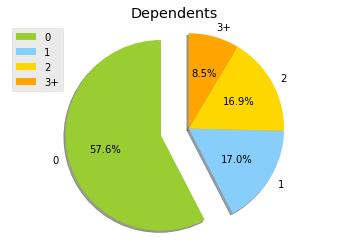

In [23]:
#  pie plot of Dependents 

labels = ['0', '1', '2', '3+']
value = [345, 102, 101, 51]
colors = ['yellowgreen','lightskyblue', 'gold', 'orange']
explode = [0.3,0,0,0]

plt.style.use('ggplot')
plt.title('Dependents')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

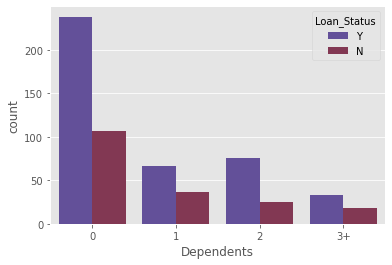

In [24]:
sns.countplot(df['Dependents'],palette='twilight',hue='Loan_Status',data=df);

<Figure size 1080x720 with 0 Axes>

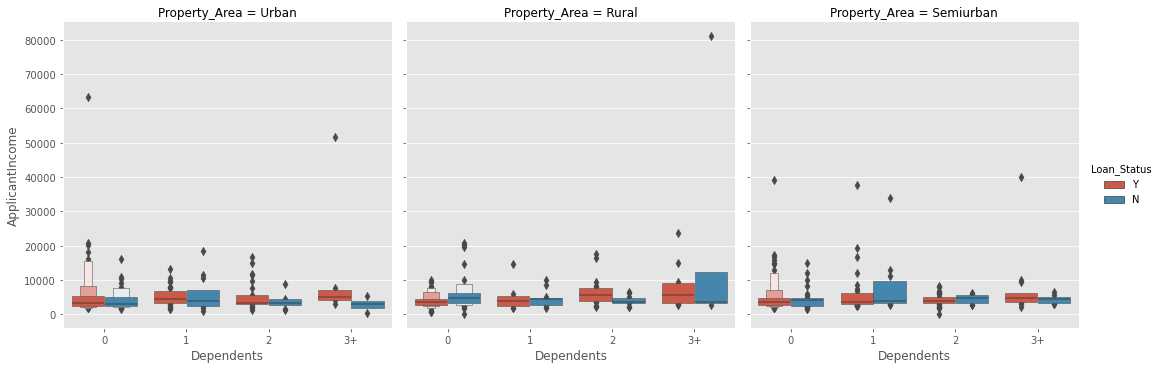

In [25]:
# Variable - 'Dependents'  Vs 'ApplicantIncome' & hue = Loan_Status, col = Proprty_Area
plt.figure(figsize=(15,10))
sns.catplot(x='Dependents',y='ApplicantIncome',data=df,kind='boxen',hue='Loan_Status', col='Property_Area')

**** From the above plots I can Analyze that "0" Dependents have a huge scope of ('345') Getting Loan rather than other Dependents.****

**Education**

In [26]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

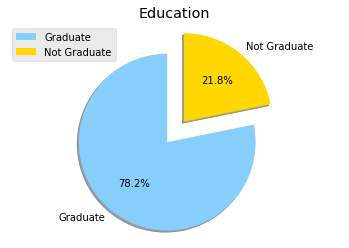

In [27]:
#  pie plot of Education 

labels = ['Graduate', 'Not Graduate']
value = [480, 134,]
colors = ['lightskyblue', 'gold']
explode = [0.3,0]

plt.style.use('ggplot')
plt.title('Education')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

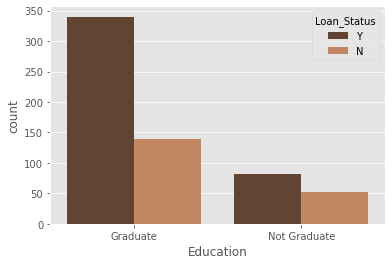

In [28]:
sns.countplot(df['Education'],palette='copper',hue='Loan_Status',data=df);

<Figure size 1080x720 with 0 Axes>

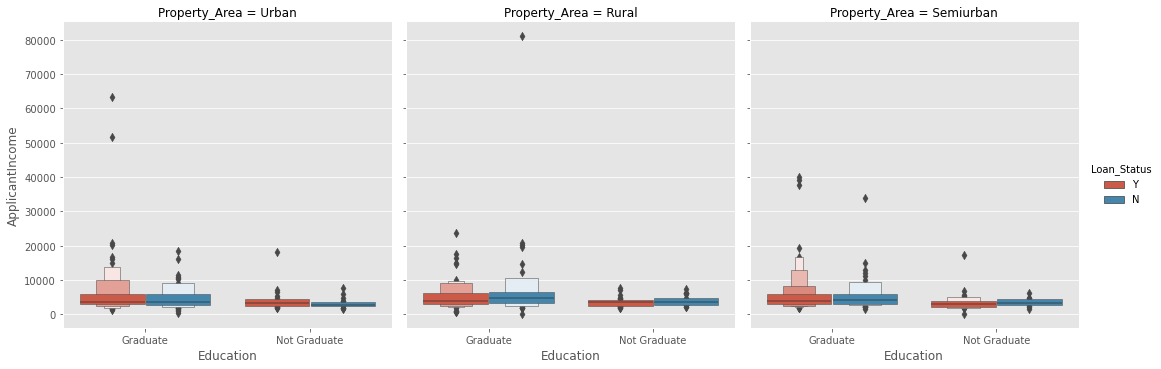

In [29]:
# Variable - 'Education'  Vs 'ApplicantIncome' & hue = Loan_Status, col = Proprty_Area
plt.figure(figsize=(15,10))
sns.catplot(x='Education',y='ApplicantIncome',data=df,kind='boxen',hue='Loan_Status', col='Property_Area')

**** EDUCATION Plots Shows that there are more number of graduates than non graduates in this dataset by comparing with Loan Status.****

**Self_Employed**

In [30]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

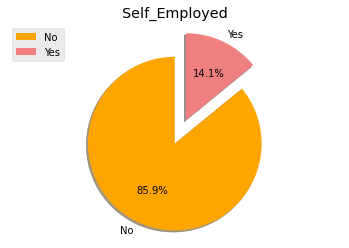

In [31]:
#  pie plot of Self_Employed 

labels = ['No', 'Yes']
value = [500, 82]
colors = ['orange', 'lightcoral']
explode = [0.3,0]

plt.style.use('ggplot')
plt.title('Self_Employed')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

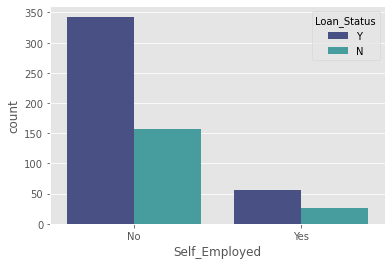

In [32]:
sns.countplot(df['Self_Employed'],palette='mako',hue='Loan_Status',data=df);

<Figure size 1080x720 with 0 Axes>

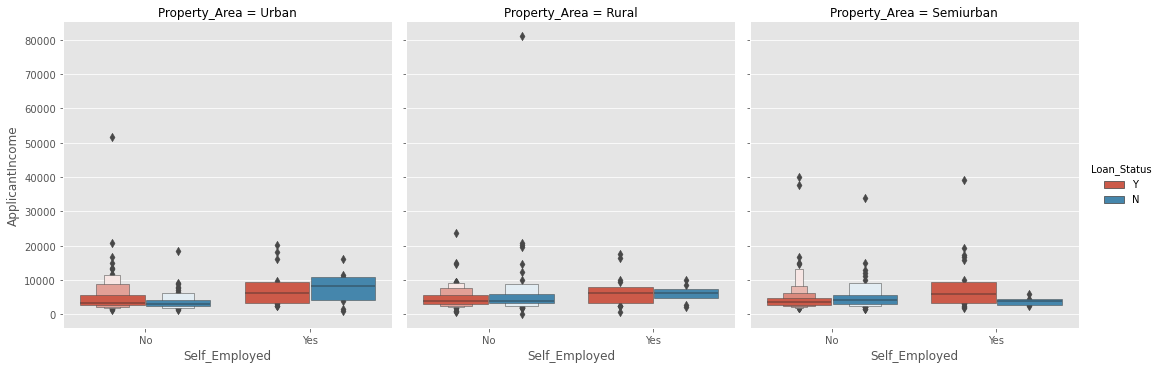

In [33]:
# Variable - 'Self_Employed'  Vs 'ApplicantIncome' & hue = Loan_Status, col = Proprty_Area
plt.figure(figsize=(15,10))
sns.catplot(x='Self_Employed',y='ApplicantIncome',data=df,kind='boxen',hue='Loan_Status', col='Property_Area')

***** From the above  plots  i can analyze that "No" signifies 500 person and "Yes" says 82 person in these dataset.****

***** So in short I can say that it doesn’t matter whether the applicant is self employed or not.*****

**Loan_Amount_Term**

In [34]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

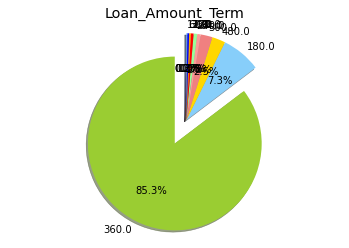

In [35]:
#  pie plot of Loan_Amount_Term 

labels = ['360.0', '180.0', '480.0', '300.0', '84.0', '240.0', '120.0', '36.0', '60.0', '12.0']
value = [512, 44, 15, 13, 4, 4, 3, 2, 2, 1]
colors = ['yellowgreen','lightskyblue','gold','lightcoral','#ff9999','#99ff99', 'red', 'orange', 'blue', '#66b3ff']
explode = [0.3,0,0,0,0,0,0,0,0,0]

plt.style.use('ggplot')
plt.title('Loan_Amount_Term')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '12.0'),
  Text(1, 0, '36.0'),
  Text(2, 0, '60.0'),
  Text(3, 0, '84.0'),
  Text(4, 0, '120.0'),
  Text(5, 0, '180.0'),
  Text(6, 0, '240.0'),
  Text(7, 0, '300.0'),
  Text(8, 0, '360.0'),
  Text(9, 0, '480.0')])

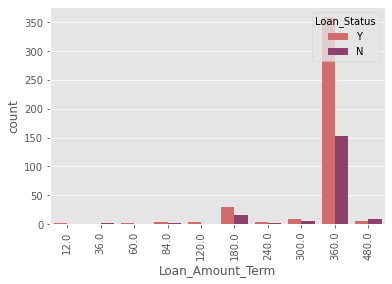

In [36]:
sns.countplot(df['Loan_Amount_Term'],palette='flare',hue='Loan_Status',data=df);
plt.xticks(rotation=90)

#### From The Above Plots I can see 512 peoples has most of the Loan Approval within term of months.

**Credit_History**

In [31]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

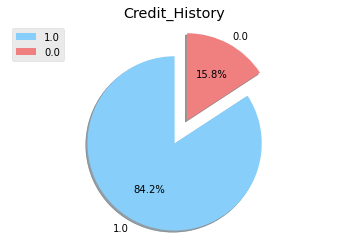

In [32]:
#  pie plot of Credit_History 

labels = ['1.0', '0.0']
value = [475, 89]
colors = ['lightskyblue', 'lightcoral']
explode = [0.3,0]

plt.style.use('ggplot')
plt.title('Credit_History')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

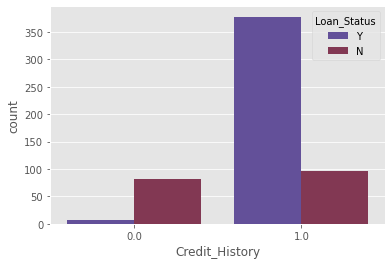

In [33]:
sns.countplot(df['Credit_History'],palette='twilight',hue='Loan_Status',data=df);

**** In the above plot i can say that Larger Percentage of people have a good credit history.****

**Property_Area**

In [34]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

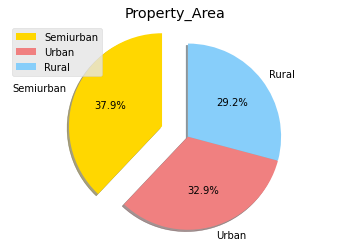

In [35]:
#  pie plot of Property_Area 

labels = ['Semiurban', 'Urban', 'Rural']
value = [233, 202, 179]
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = [0.3,0,0]

plt.style.use('ggplot')
plt.title('Property_Area')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

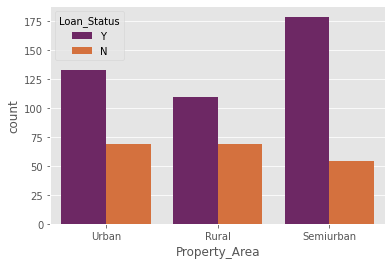

In [36]:
sns.countplot(df['Property_Area'],palette='inferno',hue='Loan_Status',data=df);

**** From the above count plot i can see that Semi-Urban peoples required Loan much than the remaining Urban & Rural Prpoerty Areas.****

In [13]:
df.drop('Loan_ID',inplace=True,axis=1)

##### Here, i am dropping Date column as it is unwanted.

In [14]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [15]:
df.shape

(614, 12)

#### Checking the dataset again after dropping the unwanted column by using shape function.

# Replacing categorial columns into numerical values

In [16]:
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0},'Loan_Status':{'N':0,'Y':1},'Dependents':{0:0,1:1,2:2,'3+':3}},inplace=True)

In [17]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [18]:
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


#### Above Describe Code signifies that there are zero values and outliers in this dataset.

# Replacing Zero Values

In [19]:
# Replacing categorial columns with mode
df['Self_Employed']=df['Self_Employed'].replace(0,df['Self_Employed'].mode()[0])
df['Property_Area']=df['Property_Area'].replace(0,df['Property_Area'].mode()[0])

# Replacing continous columns with mean
df['CoapplicantIncome'] = df['CoapplicantIncome'].replace(0,df['CoapplicantIncome'].mean())

##### After understanding the Describe I got that in this dataset there are zero values which I have replace with mean because Self_Employed, Property_Area have the zero value column categorical in nature and CoapplicantIncome is continuous in nature.

# Histogram Plot

#### Histograms group the data in bins and is the fastest way to get idea about the distribution of each attribute in dataset.
###### THe following are some of the characteristics of histograms:
###### a)provides us a count of the number of observations in each bin created for visualization.
###### b)From the shape of the bin, I can easily observe the distribution i.e. weather it is Gaussian, skewed or exponential.
###### Histograms also help us to see possible outliers.

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Married'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Self_Employed'}>],
       [<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>,
        <AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>,
        <AxesSubplot:title={'center':'Property_Area'}>,
        <AxesSubplot:title={'center':'Loan_Status'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

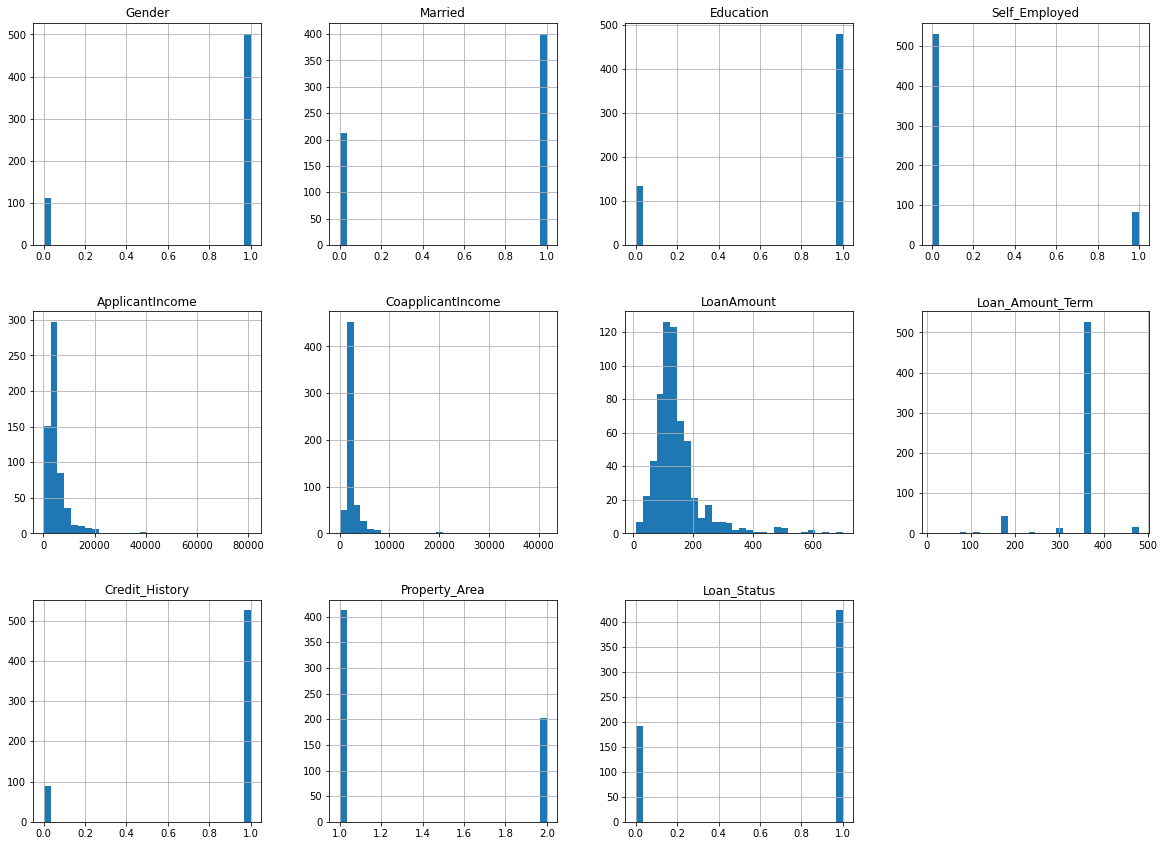

In [20]:
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

#### By making Histogram Plot I can see there are some skewness in this dataset.
#### From plotting this histogram, I used the bin size as 30, we can take any bin size (suited as per as data).

## Distribution Plot

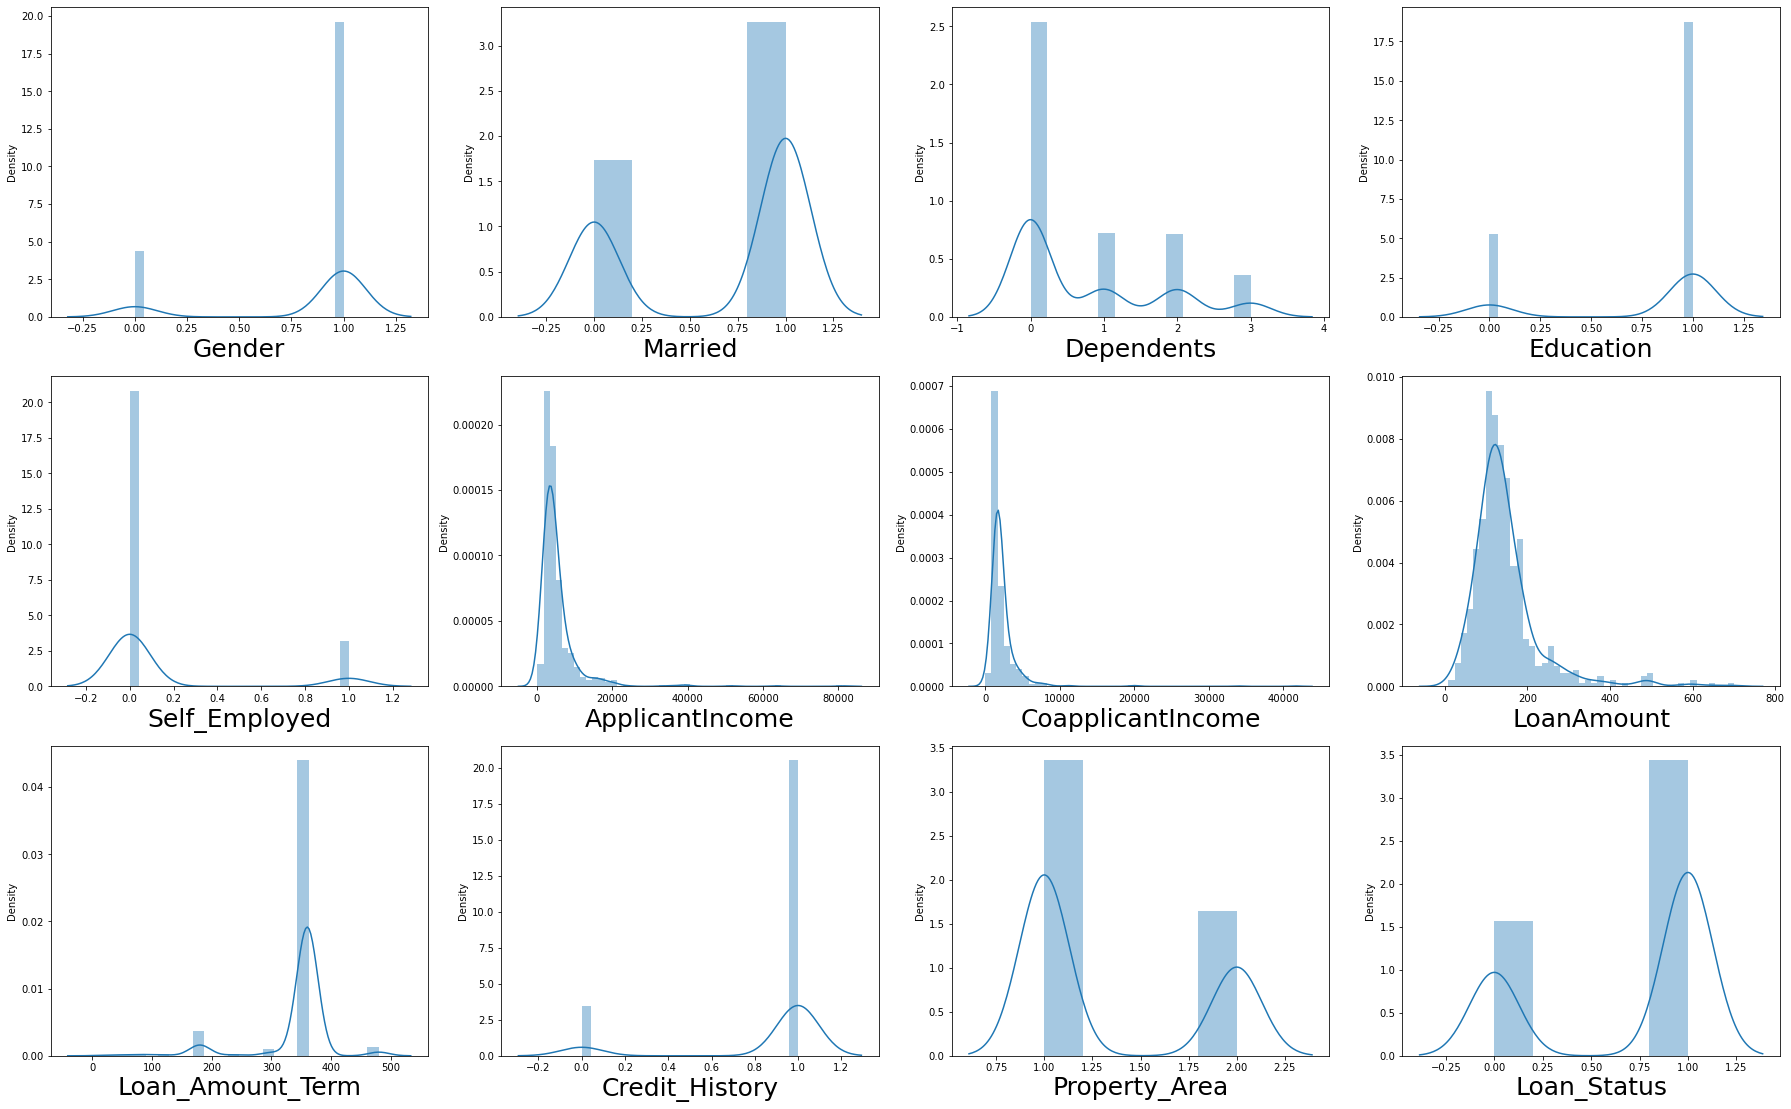

In [21]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

####  After replacing categorical columns to numerical values I use Distribution Plot to find the Skewness in this Dataset.
#### From the above  Distribution Plot I can see that there are skewness in this dataset.

## Box Plot

Gender                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
Married               AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Education             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Self_Employed         AxesSubplot(0.731522,0.71587;0.168478x0.16413)
ApplicantIncome         AxesSubplot(0.125,0.518913;0.168478x0.16413)
CoapplicantIncome    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
LoanAmount           AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Loan_Amount_Term     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Credit_History          AxesSubplot(0.125,0.321957;0.168478x0.16413)
Property_Area        AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Loan_Status          AxesSubplot(0.529348,0.321957;0.168478x0.16413)
dtype: object

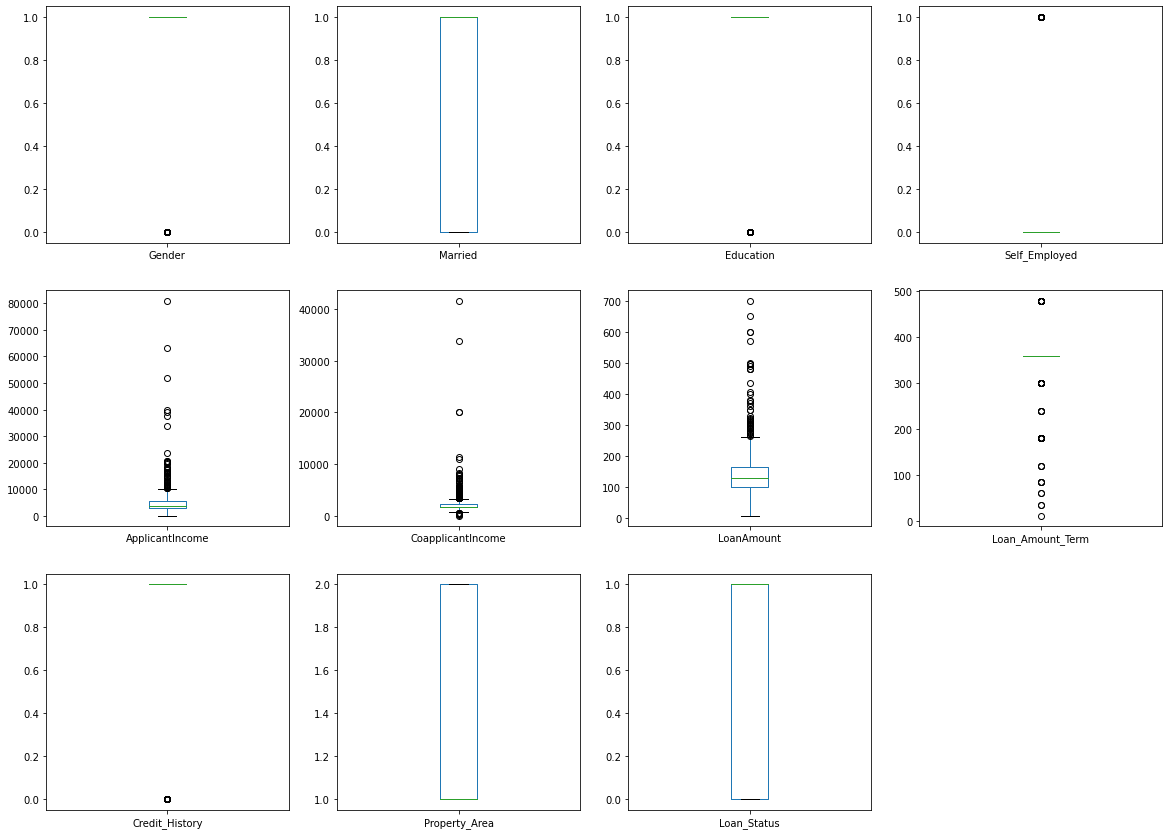

In [22]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,20))

#### From above image I can clear see that there are number of black dots in most of the column which are referring to the outliers, so it means most of the data are outside the distribution.
#### So now I detect the outliers now the second step is to remove the outliers, there are different way to remove the outliers that are zscore values.

## Removing Outliers

## Z Score

In [23]:
z_score = zscore(df[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,0.814941,0.650255,0.772496,0.129032,4649.770798,2125.815511,135.351558,342.478778,0.853990,1.329372,0.691002
std,0.388676,0.477295,0.419577,0.335521,2944.018096,1169.457218,56.320095,64.398591,0.353417,0.470385,0.462473
min,0.000000,0.000000,0.000000,0.000000,150.000000,16.120001,9.000000,12.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2873.000000,1621.245798,100.000000,360.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3750.000000,1621.245798,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5503.000000,2253.000000,160.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,20667.000000,8980.000000,380.000000,480.000000,1.000000,2.000000,1.000000


In [24]:
df.shape

(589, 12)

#### I am using zscore value then I again check if there are some of the outliers then I will remove it by replacing the outliers with the mean value of that column.
#### So, I first find the zscore value and then I decide to make one threshold value as 3 which is standard of industry recommend value and then I remove all the outliers which zscore value is greater than 3.
#### After, removing the outlier’s final there are 6908 and 24 column presents in the data set.

## Creating Distribution Plot after removing Skewness & Outliers

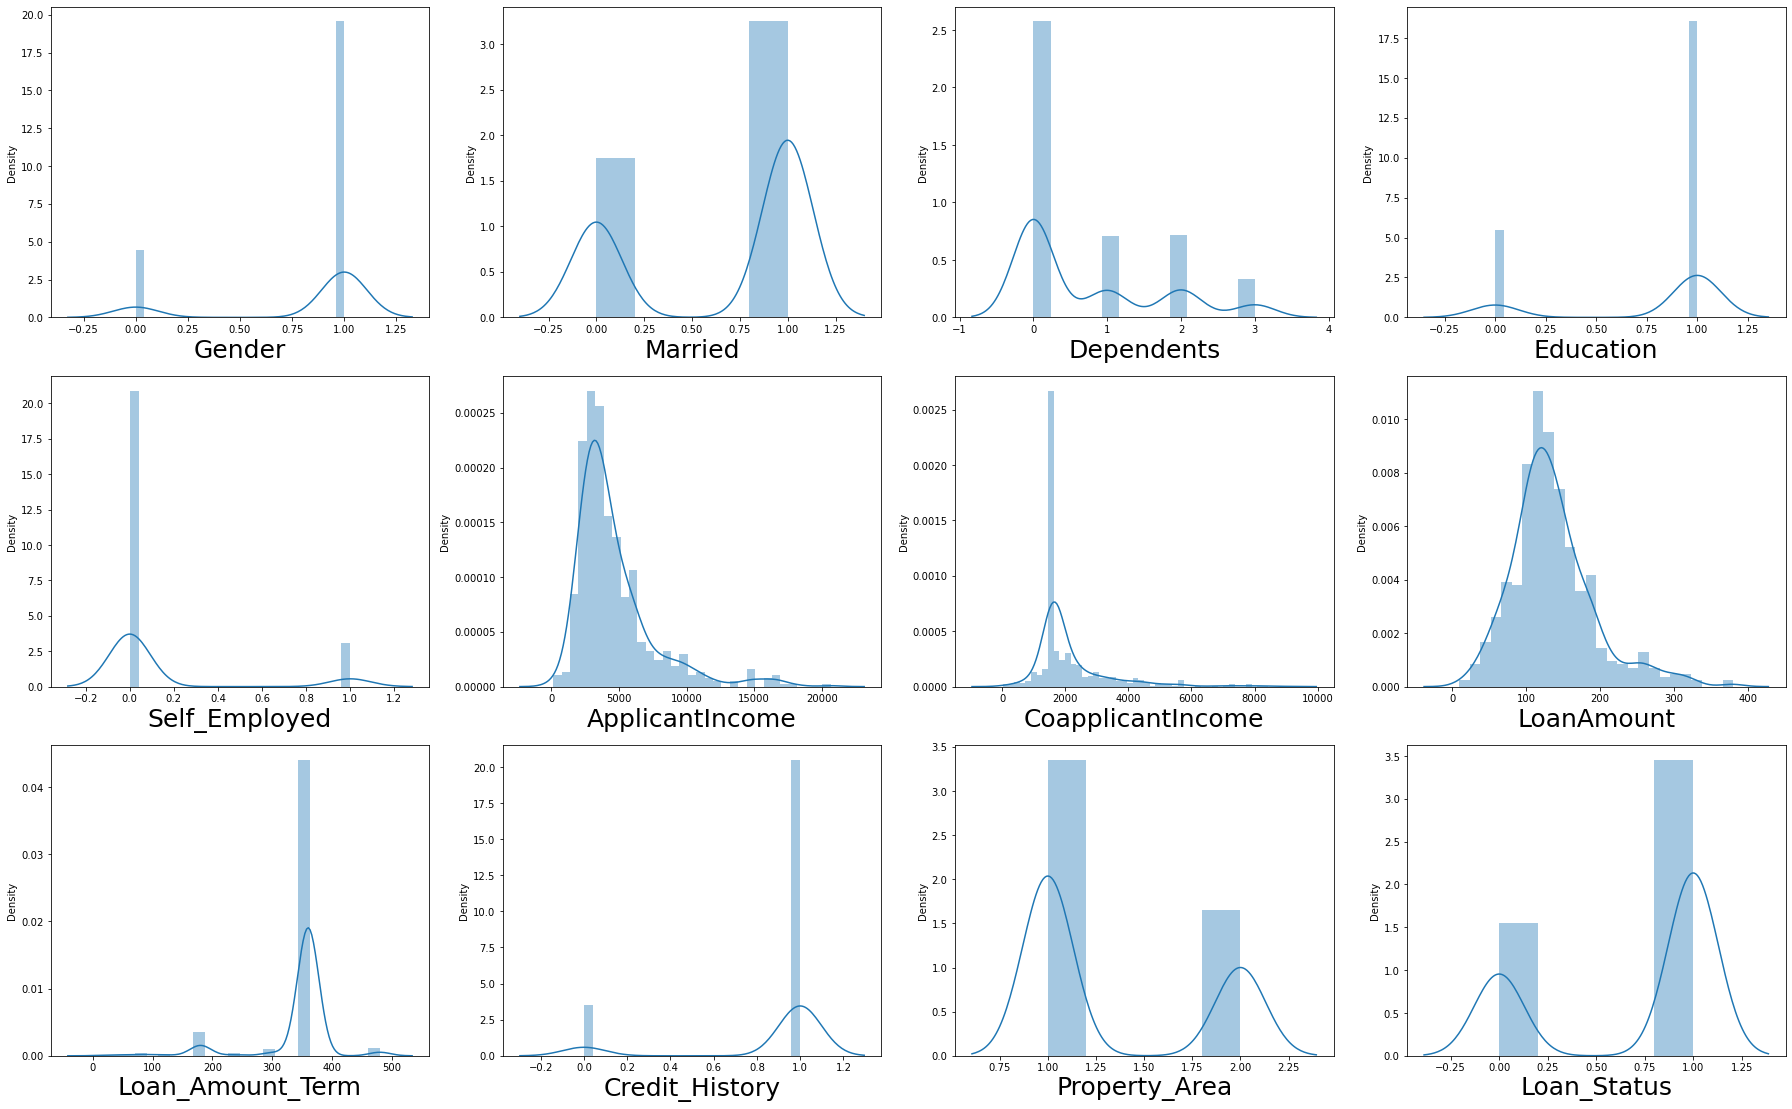

In [25]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

**** After Removing Outliers & Skewness I make Distribution Plot to understand how much my data is ready for Model Prediction.**** 

# Visualize the correlation

In [26]:
# find correlation of features vs target using corrwith

df.drop('Loan_Status',axis=1).corrwith(df.Loan_Status)

Gender               0.021942
Married              0.095124
Education            0.092852
Self_Employed       -0.016617
ApplicantIncome     -0.005043
CoapplicantIncome    0.000764
LoanAmount          -0.042738
Loan_Amount_Term    -0.023119
Credit_History       0.555908
Property_Area       -0.039514
dtype: float64

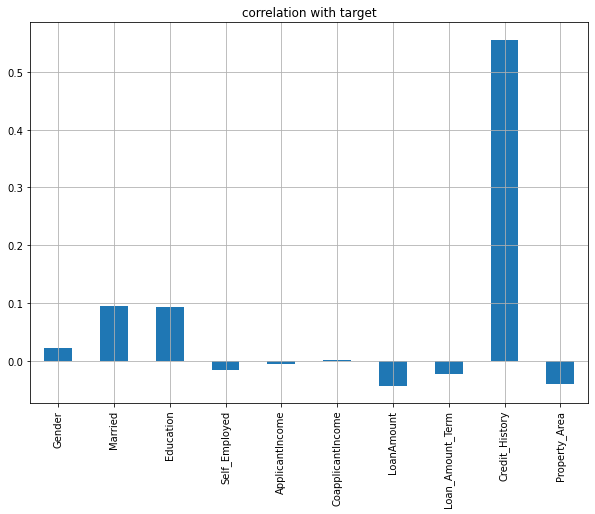

In [27]:
df.drop('Loan_Status',axis=1).corrwith(df.Loan_Status).plot(kind='bar',grid=True,figsize=(10,7),title="correlation with target")
plt.show()

#### I have checked the relationship between label and different features.
#### Most of the features are in minus value only 5 columns are positively related to target value.

# Correlation

#### Correlation Matrix is basically a covariance matrix. A summary measure called the correlation describes the strength of the linear association. Correlation summarizes the strength and direction of the linear (straight-line) association between two quantitative variables.¶
Denoted by r, it takes values between -1 and +1.

In [28]:
df.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.374745,-0.050036,0.000841,0.027728,0.109671,0.151504,-0.084919,0.013432,0.036292,0.021942
Married,0.374745,1.000000,-0.015846,-0.004453,-0.006164,0.084221,0.160541,-0.100776,0.019377,0.006443,0.095124
Education,-0.050036,-0.015846,1.000000,0.003507,0.160966,0.102238,0.149281,0.076546,0.073799,0.035639,0.092852
Self_Employed,0.000841,-0.004453,0.003507,1.000000,0.251370,0.004191,0.112636,-0.053868,-0.012954,-0.032675,-0.016617
ApplicantIncome,0.027728,-0.006164,0.160966,0.251370,1.000000,-0.077304,0.442882,-0.020069,0.034203,0.012412,-0.005043
CoapplicantIncome,0.109671,0.084221,0.102238,0.004191,-0.077304,1.000000,0.349167,-0.066603,-0.026180,-0.062893,0.000764
LoanAmount,0.151504,0.160541,0.149281,0.112636,0.442882,0.349167,1.000000,0.074949,0.003297,-0.063340,-0.042738
Loan_Amount_Term,-0.084919,-0.100776,0.076546,-0.053868,-0.020069,-0.066603,0.074949,1.000000,-0.013960,-0.090102,-0.023119
Credit_History,0.013432,0.019377,0.073799,-0.012954,0.034203,-0.026180,0.003297,-0.013960,1.000000,-0.027356,0.555908
Property_Area,0.036292,0.006443,0.035639,-0.032675,0.012412,-0.062893,-0.063340,-0.090102,-0.027356,1.000000,-0.039514


# Heatmap

#### I am using seaborn heatmap to plot the correlated matrix and plot the corr value in the heatmap graph

[]

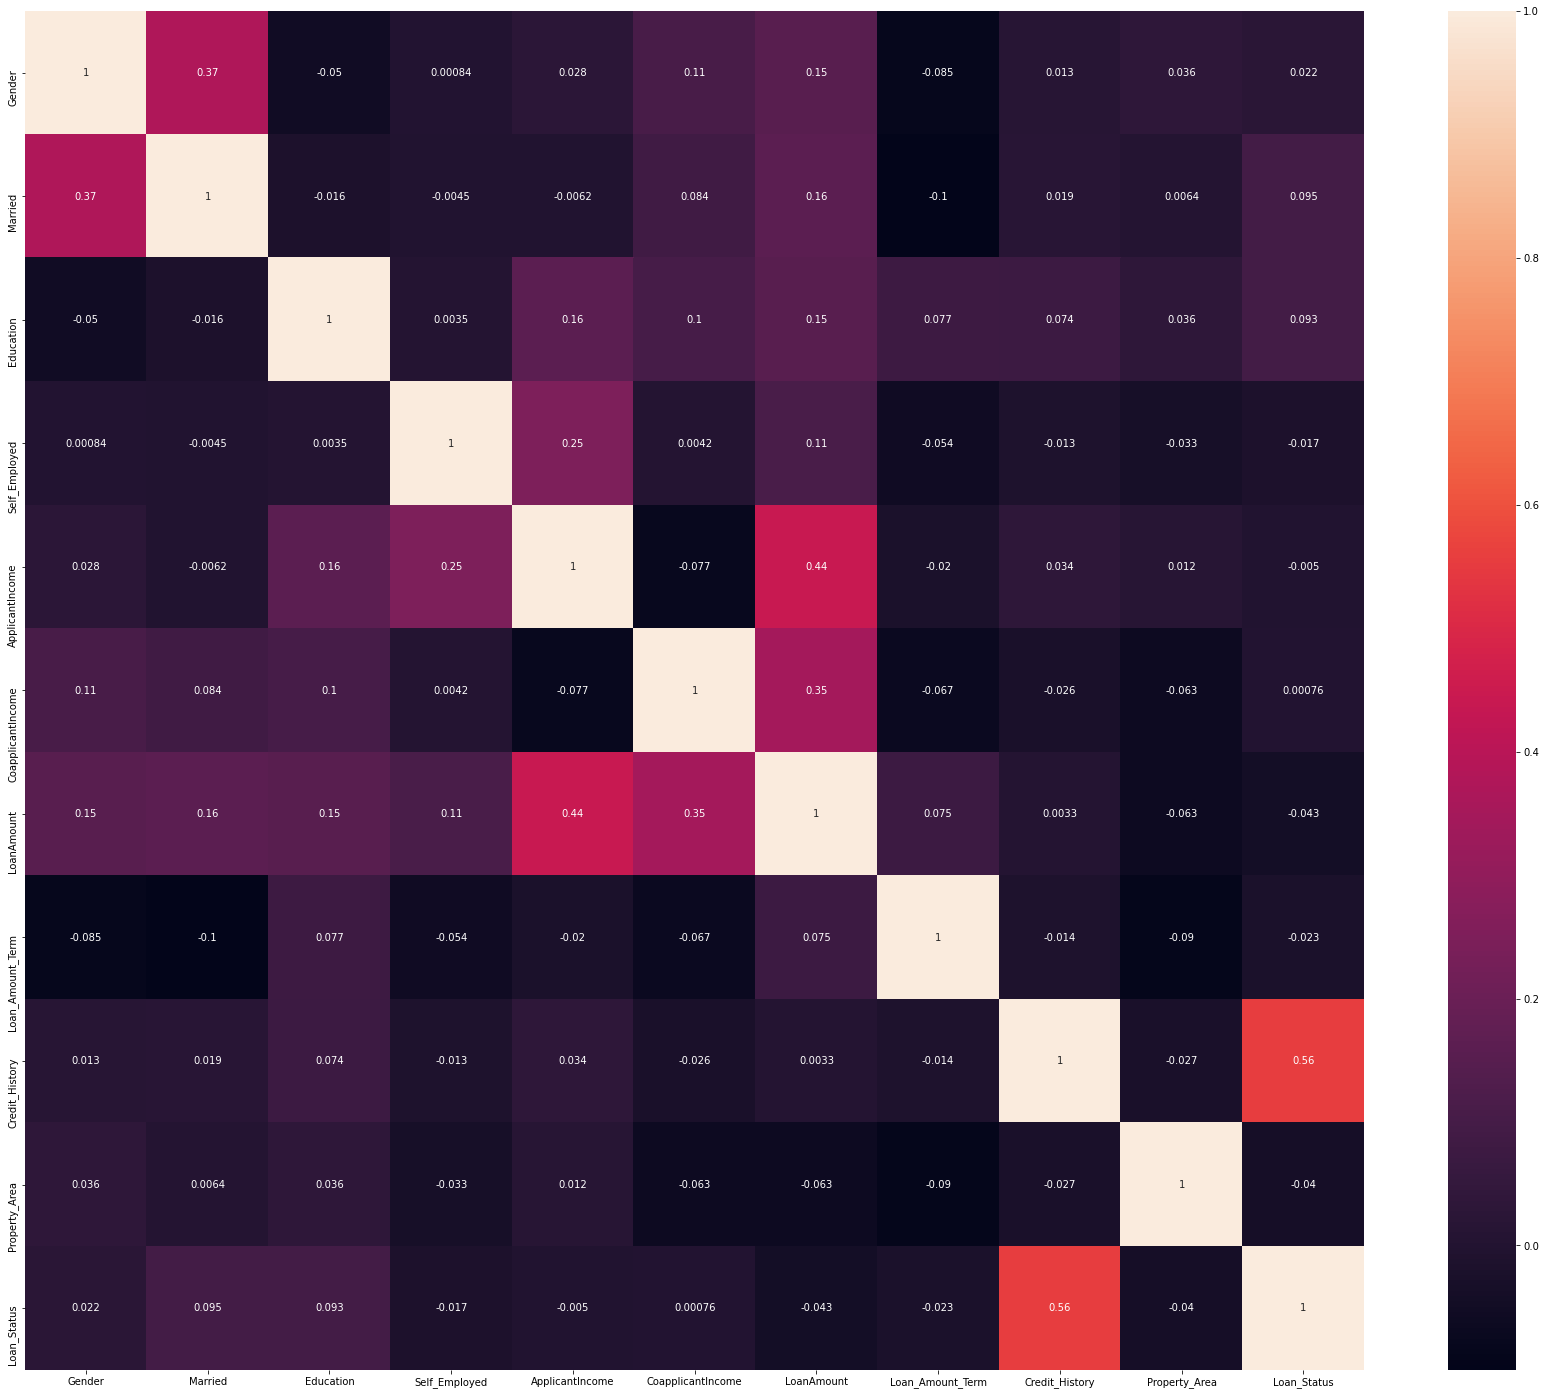

In [29]:
#checking the co-relation of all column to each other
df_cor = df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(df_cor,annot=True)
plt.plot()

# Machine Learning

### Separate response variable and features in x & y.

In [30]:
# X is the input and Y is the output

x=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Married',
        'Gender','Education','Self_Employed','Property_Area']].values
y=df[["Loan_Status"]].values

## Model Building

#### A machine learning model is built by learning and generalizing from training data, then applying that acquired knowledge to new data it has never seen before to make predictions and fulfill its purpose. Lack of data will prevent you from building the model, and access to data isn't enough.
##### So in this dataset while predicting Loan_Status label , I have used these Algorithmns for Model Building:
##### a)Logistic Regression
##### b)RandomForestClassifier
##### c)Decision Tree Classifier
##### d)XGBoost Model
##### e)AdaBoostClassifier

# Train Test Split

In [32]:
# Importing Libraries and classes
# Dividing the data in 7:3 Ratio for Training and Testing respectively

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

****Splitting the dataset into the Training set and Test set.****

****The data should be divided into train and test data.****

****I will use train_test_split feature to divide the data and I will be using testing set of 30% and a training set of 70% of the data.**** 

****I can set the random state of the split to ensure consistent results.****

## Logistic Regression

##### Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regressionis estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variablesthe independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable.
##### The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name. The unit of measurement for the log-odds scale is called a logit, from logistic unit, hence the alternative names. Analogous models with a different sigmoid function instead of the logistic function can also be used, such as the probit model; the defining characteristic of the logistic model is that increasing one of the independent variables multiplicatively scales the odds of the given outcome at a constant rate, with each independent variable having its own parameter; for a binary dependent variable this generalizes the odds ratio.

#### As here I wan’t to classify between the people who have taken loan or not I have used Logistic Regression.
#### Here is the code for Logistic Regression and Stratified Sampling.

In [33]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

#### First I have to fit the Training data of Logistic Regression.

In [34]:
y_pred = log_reg.predict(x_test)

In [35]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[ 19,  32],
       [  3, 123]], dtype=int64)

In [36]:
log_reg.score(x_test,y_test)

0.8022598870056498

              precision    recall  f1-score   support

           0       0.86      0.37      0.52        51
           1       0.79      0.98      0.88       126

    accuracy                           0.80       177
   macro avg       0.83      0.67      0.70       177
weighted avg       0.81      0.80      0.77       177



Text(0.5, 1.0, 'Logistic Regression')

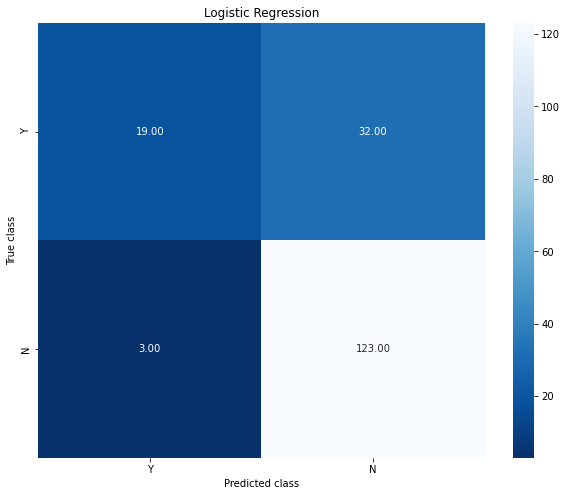

In [40]:
# Finding classification report
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["Y", "N"] , yticklabels = ["Y", "N"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

### By using Logistic Regression I Get Accuracy Score : 80%

****After modelling Logistic Regression then my next step is to find Roc Score which will help me to make Roc_Auc Curve.****

****Below is the Roc Score:****

In [41]:
# Logistic Regression
roc_auc_score(y_test,log_reg.predict(x_test))

0.6743697478991597

****So, I get Roc Score From Logistic Regresion is 67.43%.****

### In prediction Logistic Regression with Loan_Status:
###### I had done this prediction by taking Loan_Status as an output variable which is Classification in nature.
###### While calculating the best random state the 370 is best state which providing the highest accuracy value for this model.
###### After calculating confusion matrix and classification report  I used Heat Map of Logistic Regression - 80%
###### Then I found roc_auc_score of Logistic Regression which is 67.43%

## RandomForestClassifier

#### A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
###### It works in four steps:
###### Select random samples from a given dataset.
###### Construct a decision tree for each sample and get a prediction result from each decision tree.
###### Perform a vote for each predicted result.
###### Select the prediction result with the most votes as the final prediction.

In [42]:
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

#### First I have to fit the Training data of RandomForestClassifier.

In [43]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[ 22,  29],
       [ 13, 113]], dtype=int64)

In [44]:
rfc.score(x_test,y_test)

0.7627118644067796

In [45]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.63      0.43      0.51        51
           1       0.80      0.90      0.84       126

    accuracy                           0.76       177
   macro avg       0.71      0.66      0.68       177
weighted avg       0.75      0.76      0.75       177



#### According to my perception of modelling RandomForestClassifier I got Accuracy Score : 76%.
#### But this score can improve the accuracy by using Grid Search CV.

## Let use Grid search CV  to improve the accuracy

In [46]:
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]
         }

grd = GridSearchCV(rfc,param_grid=params)
grd.fit(x_train,y_train)
print(grd.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 11, 'n_estimators': 13}


In [47]:
rfc = grd.best_estimator_

In [48]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6,
                       min_samples_split=11, n_estimators=13)

In [49]:
y_pred = rfc.predict(x_test)

In [50]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[ 21,  30],
       [  3, 123]], dtype=int64)

In [51]:
rfc.score(x_test,y_test)

0.8135593220338984

              precision    recall  f1-score   support

           0       0.88      0.41      0.56        51
           1       0.80      0.98      0.88       126

    accuracy                           0.81       177
   macro avg       0.84      0.69      0.72       177
weighted avg       0.82      0.81      0.79       177



Text(0.5, 1.0, 'RandomForestClassifier')

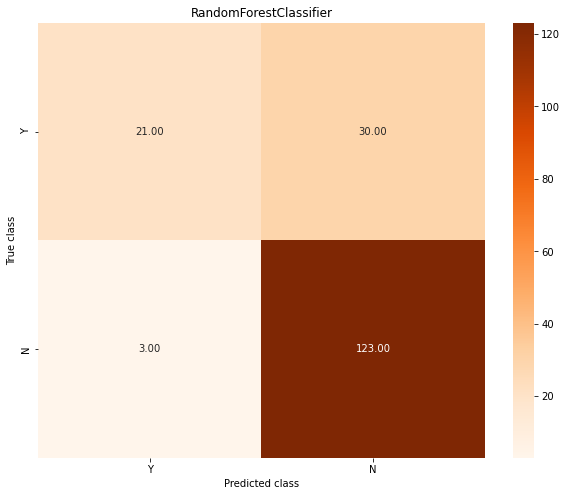

In [53]:
# Finding classification report of RandomForestClassifier
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["Y", "N"] , yticklabels = ["Y", "N"] ,cmap ="Oranges")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('RandomForestClassifier')

##### After modelling RandomForestClassifier then my next step is to find Roc Score which will help me to make Roc_Auc Curve.
##### Below is the Roc Score:

In [54]:
# Random forest  
roc_auc_score(y_test,rfc.predict(x_test))

0.6939775910364145

#### By using Grid Search CV I improve the Accuracy Score : 69.39%¶

### In prediction RandomForestClassifier with Loan_Status:
###### I had done this prediction by taking Loan_Status as an output variable which is Classification in nature.
###### While calculating the best random state the 0 is best state which providing the highest accuracy value for this model.
###### After calculating confusion matrix and classification report of RandomForestClassifier - 76%.
###### Therefore i use hypertuning method by using Grid Search Cv to improve my Accuracy Score and this gives a increasing value of RandomForestClassifier - 81%  
###### Then I found roc_auc_score of RandomForestClassifier which is 69.98%.

# Decision Tree Classifier

#### Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.
#### The tree's branches contain the logic for a decision rule, meaning your data is continually split given the input features. The decision tree classifier is commonly used for image classification, decision analysis, strategy analysis, in medicine for diagnosis, in psychology for behavioral thinking analysis, and more.

### After using Random Forest Classifier I use Decision Tree Classifier to predict the loan_Status.

In [55]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

#### First I have to fit the Training data of Decision Tree Classifier.

In [56]:
y_pred = log_reg.predict(x_test)

In [57]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[ 19,  32],
       [  3, 123]], dtype=int64)

In [58]:
dtc.score(x_test,y_test)

0.7288135593220338

In [59]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.86      0.37      0.52        51
           1       0.79      0.98      0.88       126

    accuracy                           0.80       177
   macro avg       0.83      0.67      0.70       177
weighted avg       0.81      0.80      0.77       177



#### According to my perception of modelling Decision Tree Classifier I got Accuracy Score : 80%.
#### But this score can improve the accuracy by using Grid Search CV.

## Let use Grid search CV  to improve the accuracy

In [60]:
grid_param = {'criterion':['gini','entropy'],
             'max_depth':range(2,10,3),
             'min_samples_leaf':range(1,10,2),
             'min_samples_split':range(2,10,2)
             }

In [61]:
grid_search = GridSearchCV(estimator=dtc,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=1)

In [62]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [63]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 7, 'min_samples_split': 2}


In [64]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=9,min_samples_split=6)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=9, min_samples_split=6)

In [65]:
y_pred = dtc.predict(x_test)

In [66]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[ 22,  29],
       [ 13, 113]], dtype=int64)

In [67]:
dtc.score(x_test,y_test)

0.7627118644067796

              precision    recall  f1-score   support

           0       0.63      0.43      0.51        51
           1       0.80      0.90      0.84       126

    accuracy                           0.76       177
   macro avg       0.71      0.66      0.68       177
weighted avg       0.75      0.76      0.75       177



Text(0.5, 1.0, 'DecisionTreeClassifier')

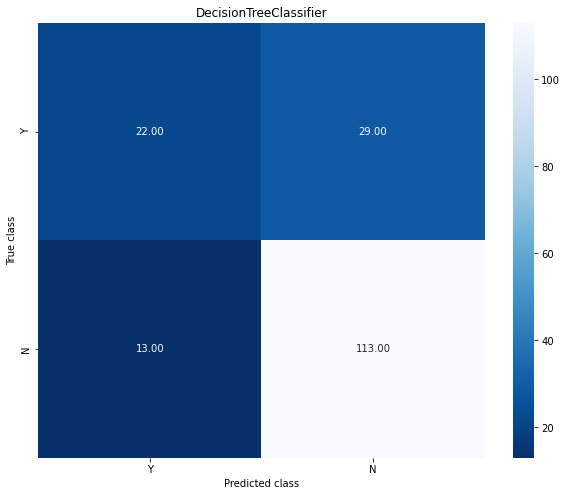

In [69]:
# Finding classification report of DecisionTreeClassifier
print(classification_report(y_test, y_pred))


plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["Y", "N"] , yticklabels = ["Y", "N"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('DecisionTreeClassifier')

#### By using Grid Search CV I improve the Accuracy Score : 76%
#### After modelling Decision Tree Classifier then my next step is to find Roc Score which will help me to make Roc_Auc Curve.
#### Below is the Roc Score:    

In [211]:
# Decision Tree Classifier AUC score
roc_auc_score(y_test,dtc.predict(x_test))

0.6640989729225024

### In prediction Decision Tree Classifier with Loan_Status:
##### I had done this prediction by taking Loan_Status as an output variable which is Classification in nature.
##### While calculating the best random state the 0 is best state which providing the highest accuracy value for this model.
##### After calculating confusion matrix and classification report of Decision Tree Classifier - 80%.
##### Therefore i use hypertuning method by using Grid Search Cv to improve my Accuracy Score and this gives a increasing value of Decision Tree Classifier - 76%
##### Then I found roc_auc_score of Decision Tree Classifie which is 66.40%.

# XGBoost Model

#### XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. 
#### XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.


In [70]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

[23:18:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### First I have to fit the Training data of XGBoost Model.

In [71]:
# checking training accuracy

y_pred = xgb.predict(x_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train,predictions)
accuracy

1.0

In [72]:
# checking initial test accuracy

y_pred = xgb.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test,predictions)
accuracy

0.7457627118644068

In [73]:
x_test

array([[8.3330000e+03, 1.6212458e+03, 2.8000000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [4.9500000e+03, 1.6212458e+03, 1.2500000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 2.0000000e+00],
       [3.3330000e+03, 2.0000000e+03, 9.9000000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       ...,
       [2.6980000e+03, 2.0340000e+03, 1.2200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [2.4540000e+03, 2.3330000e+03, 1.8100000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 2.0000000e+00],
       [2.0450000e+03, 1.6190000e+03, 1.0100000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00]])

In [74]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.57      0.51      0.54        51
           1       0.81      0.84      0.82       126

    accuracy                           0.75       177
   macro avg       0.69      0.68      0.68       177
weighted avg       0.74      0.75      0.74       177



#### According to my perception of modelling XGBoost Model I got Accuracy Score : 75%.
#### But this score can improve the accuracy by using Grid Search CV.

# Let use Grid search CV  to improve the accuracy

In [75]:
param_grid = {'learning_rate':[1,0.5,0.1,0.01,0.001],
             'max_depth':[3,5,10,20],
             'n_estimators':[10,50,100,200]
             }

In [76]:
grid = GridSearchCV(XGBClassifier(),param_grid,verbose=3)

In [77]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[23:18:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.747 total time=   0.0s
[23:18:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.843 total time=   0.0s
[23:18:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the d

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [78]:
# to find best parameters giving maximum accuracy

grid.best_params_

{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 10}

In [79]:
xgb = XGBClassifier(learning_rate='1',max_depth=3,n_estimators=10)
xgb.fit(x_train,y_train)

[23:18:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate='1', max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
y_pred = xgb.predict(x_test)

In [81]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[ 23,  28],
       [ 20, 106]], dtype=int64)

In [82]:
xgb.score(x_test,y_test)

0.7288135593220338

              precision    recall  f1-score   support

           0       0.53      0.45      0.49        51
           1       0.79      0.84      0.82       126

    accuracy                           0.73       177
   macro avg       0.66      0.65      0.65       177
weighted avg       0.72      0.73      0.72       177



Text(0.5, 1.0, 'XGBClassifier')

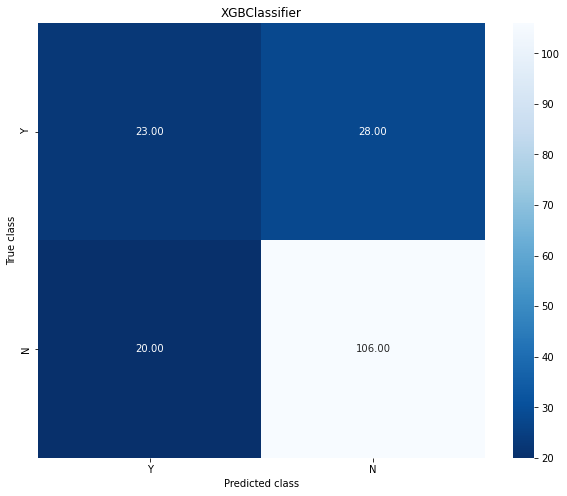

In [84]:
# Finding classification report
print(classification_report(y_test, y_pred))


plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["Y", "N"] , yticklabels = ["Y", "N"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('XGBClassifier')

#### By using Grid Search CV I improve the Accuracy Score : 73%
#### After modelling  XGBClassifier then my next step is to find Roc Score which will help me to make Roc_Auc Curve.
#### Below is the Roc Score:

In [85]:
# XGBClassifier 
roc_auc_score(y_test,xgb.predict(x_test))

0.646125116713352

### In prediction XGBClassifier  with Loan_Status:
###### I had done this prediction by taking Loan_Status as an output variable which is Classification in nature.
###### While calculating the best random state the 0 is best state which providing the highest accuracy value for this model.
###### After calculating confusion matrix and classification report of XGBClassifier  - 75%.
###### Therefore i use hypertuning method by using Grid Search Cv to improve my Accuracy Score and this gives a decreasing value of XGBClassifier  - 73%
###### Then I found roc_auc_score of XGBClassifier  which is 66.46%.

# AdaBoostClassifier

##### AdaBoost can be used to boost the performance of any machine learning algorithm. It is best used with weak learners. These are models that achieve accuracy just above random chance on a classification problem. The most suited and therefore most common algorithm used with AdaBoost are decision trees with one level.

In [86]:
ada = AdaBoostClassifier()

In [87]:
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

#### First I have to fit the Training data of AdaBoostClassifier.

In [88]:
#accuracy_score before tuning
print(accuracy_score(y_test,y_pred))

0.768361581920904


# Hyperparameter tuning for AdaBoost using GridSearchCV

In [89]:
params = {'n_estimators':[40,42,44,45],'learning_rate':[0.20,0.22,0.234567]}

In [90]:
grd_ada = GridSearchCV(AdaBoostClassifier(),param_grid = params)

In [91]:
grd_ada.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.2, 0.22, 0.234567],
                         'n_estimators': [40, 42, 44, 45]})

In [92]:
grd_ada.best_estimator_

AdaBoostClassifier(learning_rate=0.2, n_estimators=40)

In [93]:
ada = AdaBoostClassifier(learning_rate = 0.2434567,n_estimators = 44)

In [94]:
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

In [95]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[ 20,  31],
       [  1, 125]], dtype=int64)

In [96]:
ada.score(x_test,y_test)

0.8192090395480226

              precision    recall  f1-score   support

           0       0.95      0.39      0.56        51
           1       0.80      0.99      0.89       126

    accuracy                           0.82       177
   macro avg       0.88      0.69      0.72       177
weighted avg       0.84      0.82      0.79       177



Text(0.5, 1.0, 'AdaBoostClassifier')

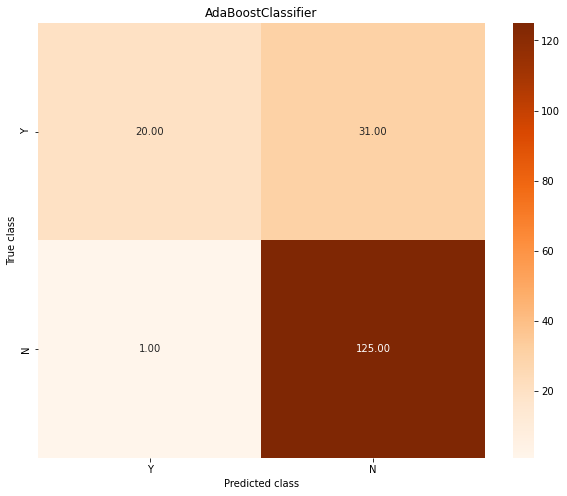

In [97]:
# Finding classification report
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["Y", "N"] , yticklabels = ["Y", "N"] ,cmap = "Oranges")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('AdaBoostClassifier')

In [98]:
# AdaBoostClassifier 
roc_auc_score(y_test,ada.predict(x_test))

0.692110177404295

## In prediction AdaBoostClassifier  with Loan_Status:
#### I had done this prediction by taking Loan_Status as an output variable which is Classification in nature.
#### While calculating the best random state the 0 is best state which providing the highest accuracy value for this model.
#### After calculating confusion matrix and classification report of AdaBoostClassifier  - 76.83%.
#### Therefore i use hypertuning method by using Grid Search Cv to improve my Accuracy Score and this gives a increasing value of AdaBoostClassifier  - 82%
#### Then I found roc_auc_score of AdaBoostClassifier  which is 69.21%.

## Roc_Auc Curve 

#### In Machine Learning, performance measurement is an essential task. 
#### So when it comes to a classification problem, I can count on an AUC - ROC Curve. 
#### When I need to check or visualize the performance of the multi-class classification problem, I use the AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve. 
#### It is one of the most important evaluation metrics for checking any classification model’s performance. It is also written as AUROC (Area Under the Receiver Operating Characteristics).

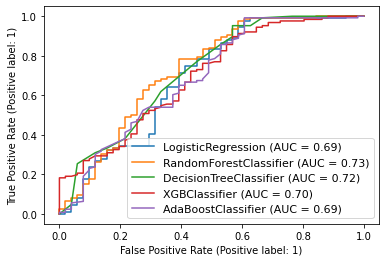

In [99]:
disp = plot_roc_curve(log_reg,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dtc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

## Summary:
#### ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
#### ROC curves are appropriate when the observations are balanced or not.
#### According to my  I can say that AdaBoostClassifier  with 82% is the  best predictive model in this Dataset.

## Conclusion

### In the modeling Building section, we have seen the hyperparameter tuned AdaBoostClassifier with 82%
### It can be clearly seen the feature engineering effects on each individual nine model in 'Comparison of ML Classifiers with Effects of Future Engineering' Roc Curve chart above.

### I’ll briefly discuss how I approached this problem of predicting loan prediction.

#### a) I  have Loan Prdiction datastet from which I had to extract information.
#### b ) I had used pandas library to read the Dataset which provide me to explore & viualize the Data properly based on Rows & Columns.
#### c) After from all datasets, I preprocessed the data using imputer function to fill the missing values and replacing all zeros.
#### d) I did exploratory data analysis on main data frame and tried to remove all the possible outliers.
#### e) Based on visulization  knowledge, I use various EDA TECHNIQUES to plot the graphs and Z - SCORE.
#### f) I use VIF and Standard Scalar to scaled the data and by VIF I make a relationship between Features & Features.
#### g) After from all these i split the Features & Labels into 2 parts.
#### h) On this data, I have applied our machine learning models such as logistic regression, Random forest,Decision Tree and KNN.

## Saving the Best Model

In [100]:
import pickle

In [101]:
# saving the AdaBoostClassifier

filename = 'finalized_model.pickle'
pickle.dump(ada,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

### From the Above Coding I Get best model AdaBoostClassifierAccuracy Score.
### So I use AdaBoostClassifier to Save the Best Model.